In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
pulse_data = np.loadtxt("/Users/jonathontordilla/Desktop/hombom24/board-analysis/hom_data_txt/homtrigger2_1.txt", dtype=int)

In [26]:
fft_size = 1024
start = 408
stop = start + fft_size

cap = 20
cplx0 = pulse_data[cap] + pulse_data[cap + 100] * 1j
cplx_m0 = abs(cplx0)
cplx_p0 = np.angle(cplx0, deg=True)

cplx1 = pulse_data[cap + 300] + pulse_data[cap + 200] * 1j
cplx_m1 = abs(cplx1)
cplx_p1 = np.angle(cplx1, deg=True)

size = 2**12
timeBin = 1.0E+6 / 245.76E+6 # Units of us
timeSteps = np.linspace(0, timeBin * (size - 1), num=size)

92765.1441619537


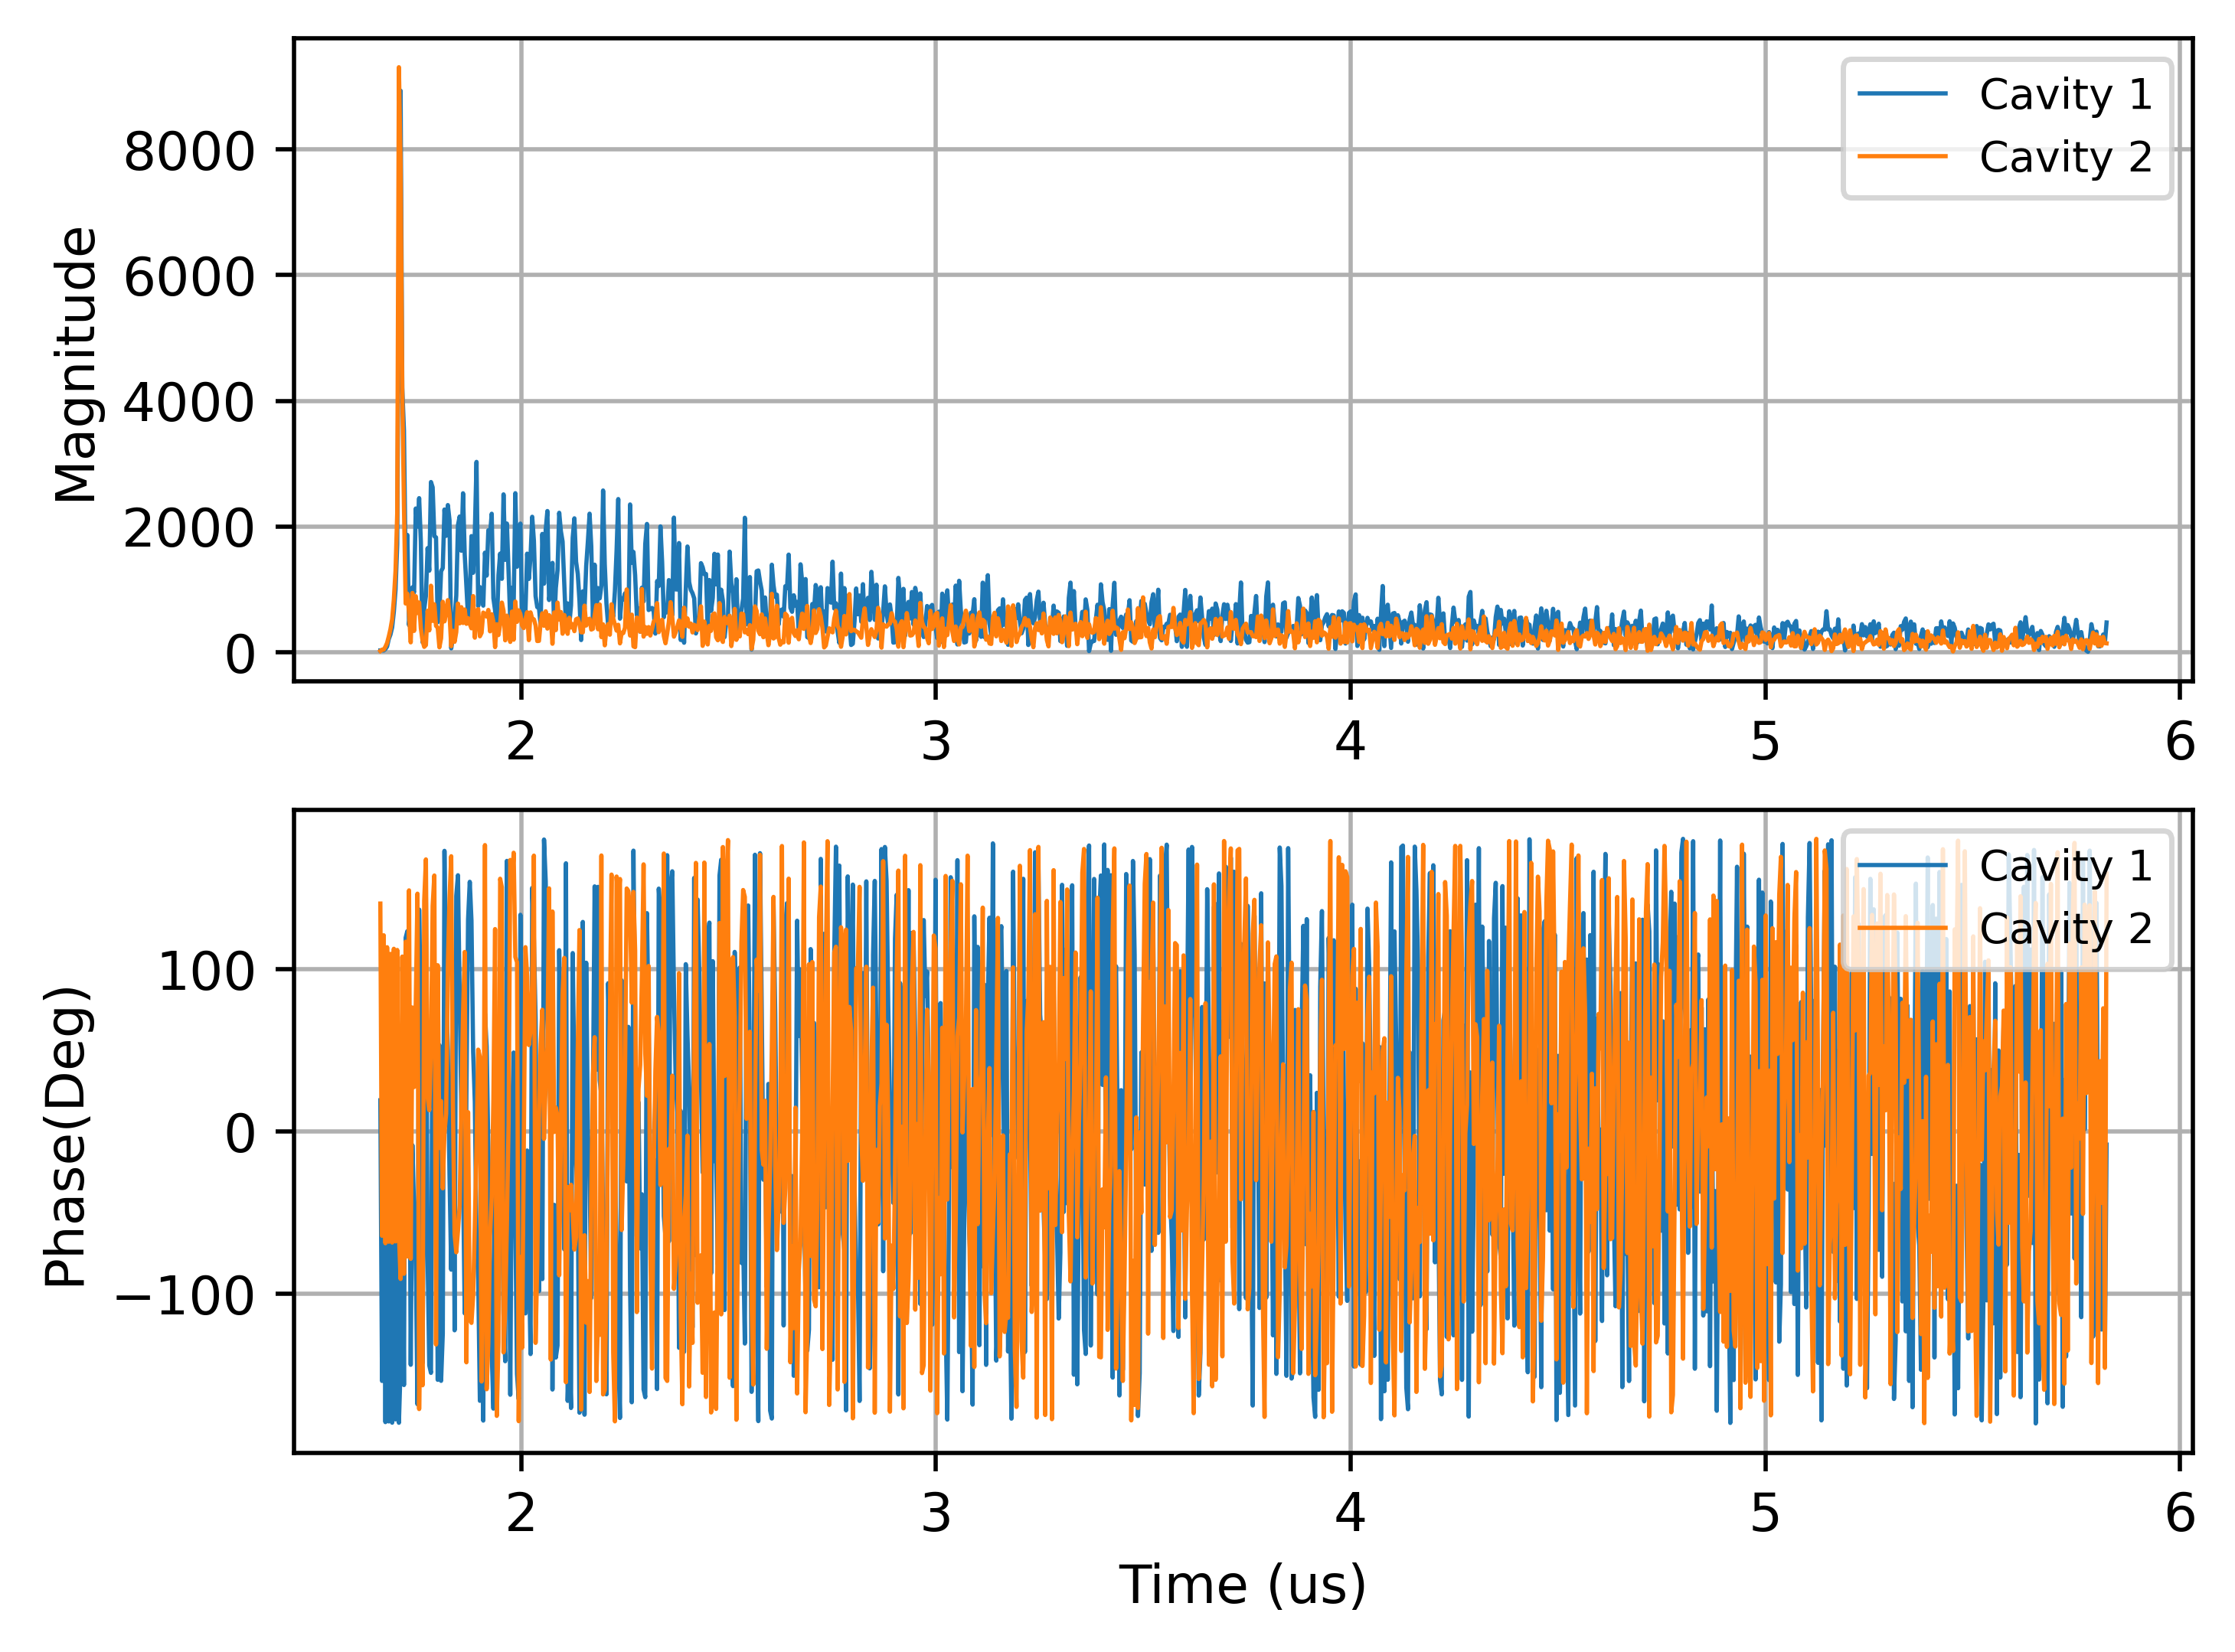

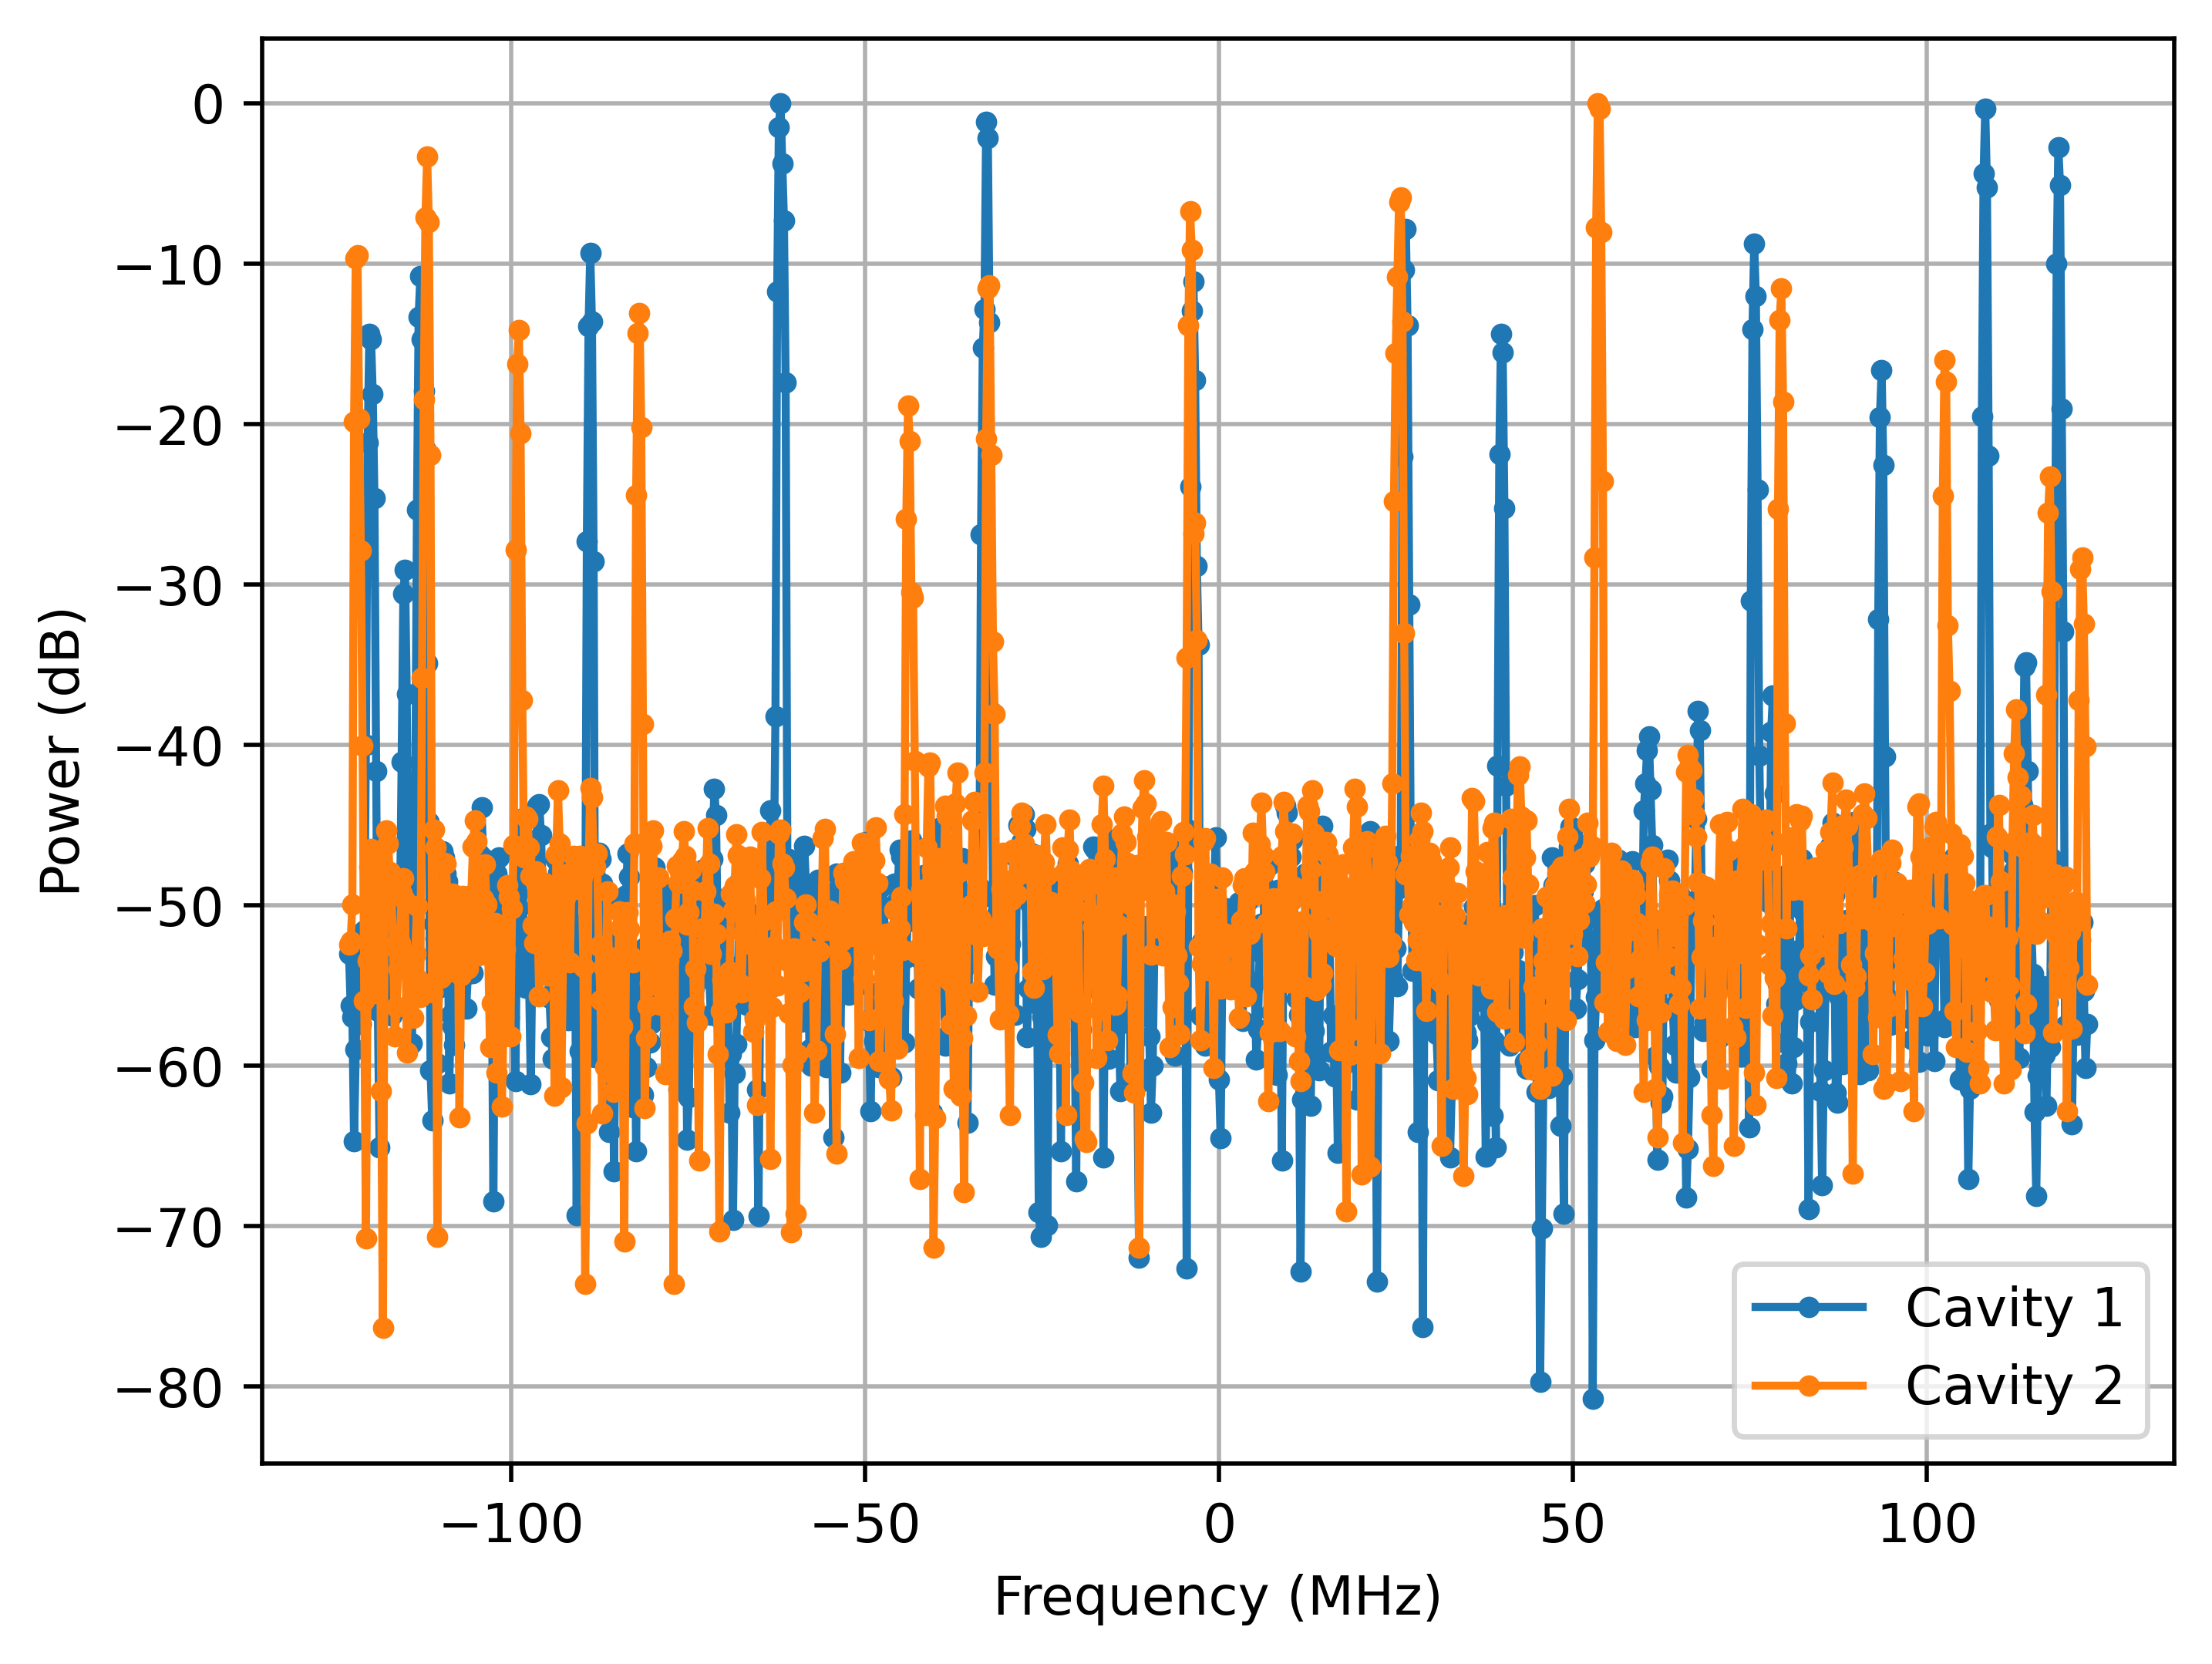

In [27]:
fig, axs = plt.subplots(2)
plt.rcParams['figure.dpi'] = 500
lw = 0.8

axs[0].plot(timeSteps[start:stop], cplx_m0[start:stop], linewidth=lw)
axs[0].plot(timeSteps[start:stop], cplx_m1[start:stop], linewidth=lw)
axs[1].plot(timeSteps[start:stop], cplx_p0[start:stop], linewidth=lw)
axs[1].plot(timeSteps[start:stop], cplx_p1[start:stop], linewidth=lw)
axs[0].legend(['Cavity 1','Cavity 2'], loc='upper right', prop={'size': 8})
axs[1].legend(['Cavity 1','Cavity 2'], loc='upper right',prop={'size': 8})

axs[1].set_xlabel("Time (us)") 
axs[0].set_ylabel("Magnitude") 
axs[1].set_ylabel("Phase(Deg)") 
axs[0].grid()
axs[1].grid()

Fs = 245.76 * 1e6
iq0 = cplx0[start:stop]
iq1 = cplx1[start:stop]

n = len(iq0)
f = Fs * np.arange(n) / n-Fs / 2
window = np.blackman(fft_size)

Y = np.fft.fft(iq0 * window)
freq = np.fft.fftfreq(n=iq1.size, d=1/Fs)
Y_abs = np.abs(Y)
p = np.int_(np.size(Y_abs))
Y_rd = np.concatenate((Y_abs[np.int_(p/2):p], Y_abs[0:np.int_(p/2)]), axis=None) 
P2log0 = 20 * np.log10(Y_rd / np.max(Y_abs))

Y = np.fft.fft(iq1 * window)
Y_abs = np.abs(Y)
p = np.int_(np.size(Y_abs))
Y_rd = np.concatenate((Y_abs[np.int_(p/2):p], Y_abs[0:np.int_(p/2)]), axis=None) 
P2log1 = 20 * np.log10(Y_rd / np.max(Y_abs))
print(np.max(Y_abs))

axs = plt.subplots(1)
plt.rcParams['figure.dpi'] = 500

plt.plot(f / 1e6,P2log0,'.-')
plt.plot(f / 1e6,P2log1,'.-')
plt.legend(['Cavity 1','Cavity 2'], loc='lower right')

plt.grid()
plt.xlabel("Frequency (MHz)") 
plt.ylabel("Power (dB)")
plt.show()